In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [3]:
df = pd.read_csv("monthlyMilkProduction.csv")
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


# Task 1: Data Preprocessing With Time Series

In [4]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [5]:
#drop the bad record
df.drop(168, axis=0, inplace=True)

In [6]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [7]:
#rename the column
df.columns = ["ds", "y"]     #month --> ds(dates) & milk production --> y(value)


In [8]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


<AxesSubplot:>

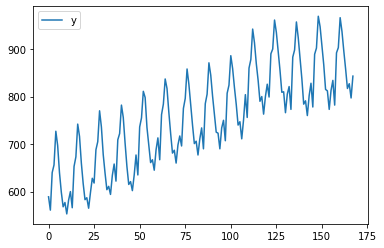

In [9]:
df.plot()

In [10]:
#convert date to yyyy-dd-mm
df['ds'] = pd.to_datetime(df['ds'])

In [11]:
df.head() 


,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

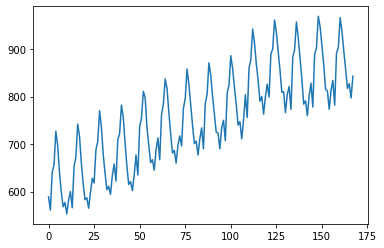

In [12]:
df['y'].plot()

<AxesSubplot:>

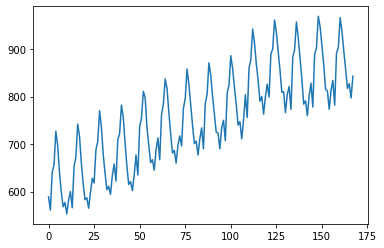

In [13]:
df['y'].plot()

Stationary data means constant "Variance"

In [14]:
#import facebook Prophet

from fbprophet import Prophet

In [15]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

# Task 2: Intialize the model

In [16]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
model  # by default model will give monthly_seasonality


In [18]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [19]:
# create some future dataframes(dates) of 365 days
#this data is used to make predictions
future_dates = model.make_future_dataframe(periods=365)

In [20]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [21]:
# Predictions
predictions = model.predict(future_dates)

In [22]:
predictions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.849794,576.524428,597.204082,606.849794,606.849794,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,0.0,0.0,0.0,586.745106
1,1962-02-01,608.569237,535.966670,555.793504,608.569237,608.569237,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,0.0,0.0,0.0,546.026015
2,1962-03-01,610.122282,632.145077,652.088467,610.122282,610.122282,31.413370,31.413370,31.413370,31.413370,31.413370,31.413370,0.0,0.0,0.0,641.535653
3,1962-04-01,611.841725,648.224124,668.341374,611.841725,611.841725,46.743537,46.743537,46.743537,46.743537,46.743537,46.743537,0.0,0.0,0.0,658.585263
4,1962-05-01,613.505703,712.201951,731.718800,613.505703,613.505703,108.056343,108.056343,108.056343,108.056343,108.056343,108.056343,0.0,0.0,0.0,721.562045


In [23]:
predictions[['ds', 'yhat','yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.170733,803.464093,825.963000
529,1976-11-27,818.390320,807.016626,829.122668
530,1976-11-28,821.779740,810.744026,833.711803
531,1976-11-29,825.275899,814.447128,837.020666
532,1976-11-30,828.808844,817.374815,840.313003


# Task 3 : Plot the predicted projection

Blue line ---> the predicted value.

Black dot ---> real data in our dataset

Light Blue --> trends

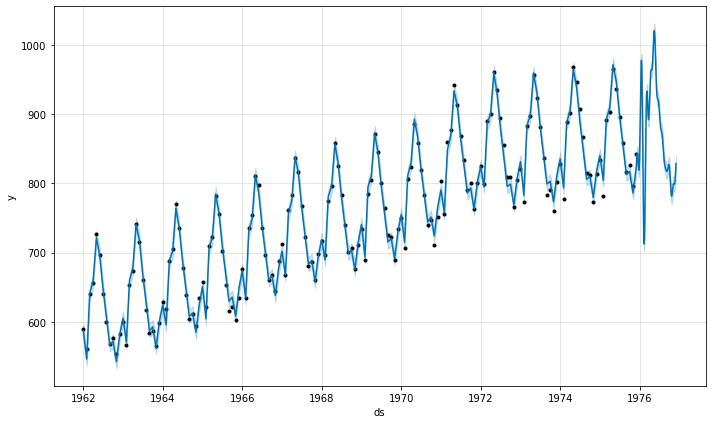

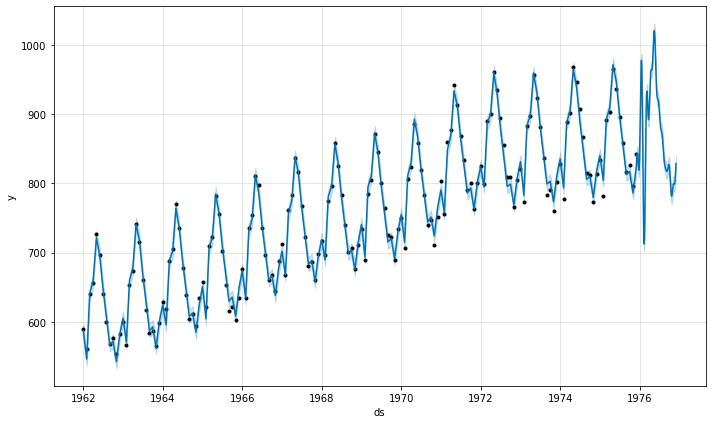

In [24]:
model.plot(predictions)

# Task 4 : Visualize each componennt

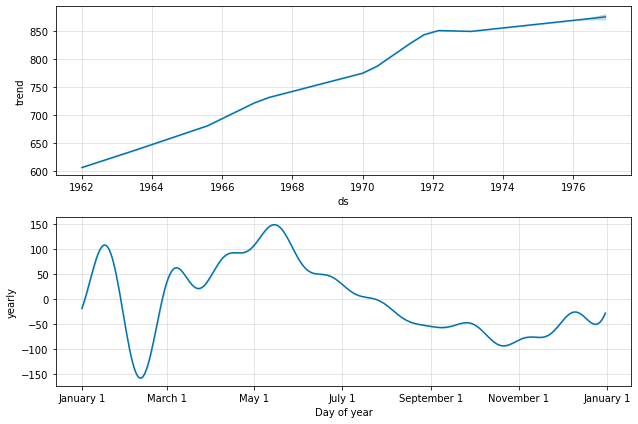

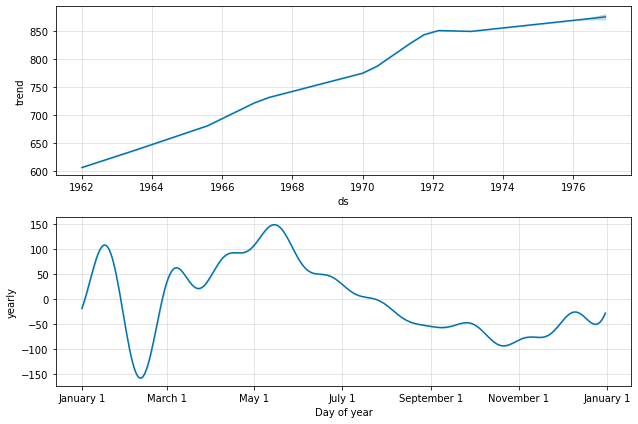

In [25]:
model.plot_components(predictions)

# Task 5: Cross Validation

we will do this by comparing the predicted values with actual values. 

Select Cut off Points in the history of data then fit model with data upto that cut off point.

Then we compare the actual values to the predicted values. 

This Takes following parameter:
    1. horizon --> the forcast horizon
    2. initial size of initial training period
    3. period the spacing between cutoff dates

In [26]:
from fbprophet.diagnostics import cross_validation

In [27]:
df_cv = cross_validation(model, horizon = "365 days", period='180 days', initial = '1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


  0%|          | 0/21 [00:00<?, ?it/s]

In [28]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,619.087141,617.181376,620.893104,622.0,1965-01-22
1,1965-03-01,697.071986,690.766631,703.143640,709.0,1965-01-22
2,1965-04-01,709.290761,695.191876,722.816544,722.0,1965-01-22
3,1965-05-01,774.436723,753.864978,794.641759,782.0,1965-01-22
4,1965-06-01,742.879282,712.291523,771.475716,756.0,1965-01-22


In [29]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
247,1975-08-01,850.582813,840.886568,860.287246,858.0,1974-12-01
248,1975-09-01,808.189317,798.175709,818.120106,817.0,1974-12-01
249,1975-10-01,811.611644,800.659902,822.484269,827.0,1974-12-01
250,1975-11-01,779.609808,768.329745,790.839818,797.0,1974-12-01
251,1975-12-01,814.158114,803.622412,825.344672,843.0,1974-12-01


In [30]:
#performance matrix
from fbprophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,257.644337,16.051303,12.572310,0.016147,0.014236,0.32
1,41 days,255.691801,15.990366,12.493472,0.016083,0.014236,0.32
2,42 days,271.279611,16.470568,12.972159,0.016746,0.014528,0.32
3,43 days,273.143144,16.527043,13.204699,0.017115,0.014528,0.32
4,46 days,259.725549,16.116003,12.958665,0.016791,0.014528,0.32


In [31]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,257.644337,16.051303,12.572310,0.016147,0.014236,0.32
1,41 days,255.691801,15.990366,12.493472,0.016083,0.014236,0.32
2,42 days,271.279611,16.470568,12.972159,0.016746,0.014528,0.32
3,43 days,273.143144,16.527043,13.204699,0.017115,0.014528,0.32
4,46 days,259.725549,16.116003,12.958665,0.016791,0.014528,0.32
...,...,...,...,...,...,...,...
180,357 days,881.141224,29.684023,22.511721,0.028321,0.021820,0.36
181,360 days,687.891427,26.227684,19.452020,0.024156,0.017203,0.40
182,361 days,675.174515,25.984120,19.054909,0.023753,0.014183,0.40
183,362 days,658.322393,25.657794,18.347110,0.022942,0.013880,0.44


C:\Users\Sandesh\Anaconda3\lib\site-packages\fbprophet\plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Users\Sandesh\Anaconda3\lib\site-packages\fbprophet\plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


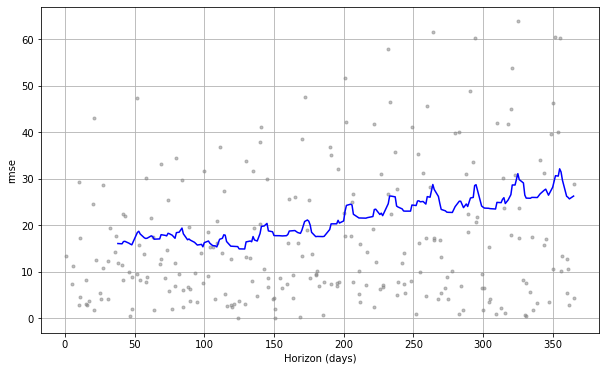

In [32]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')